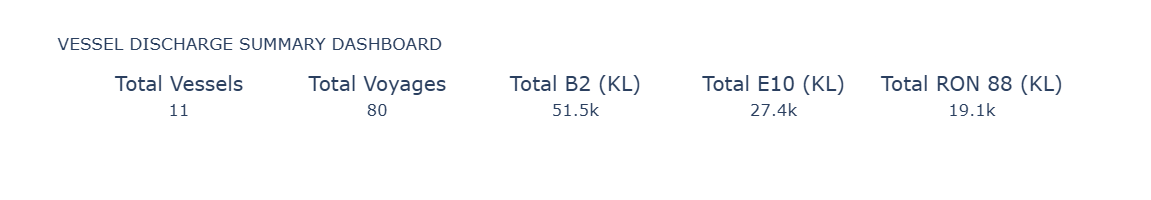

Output()

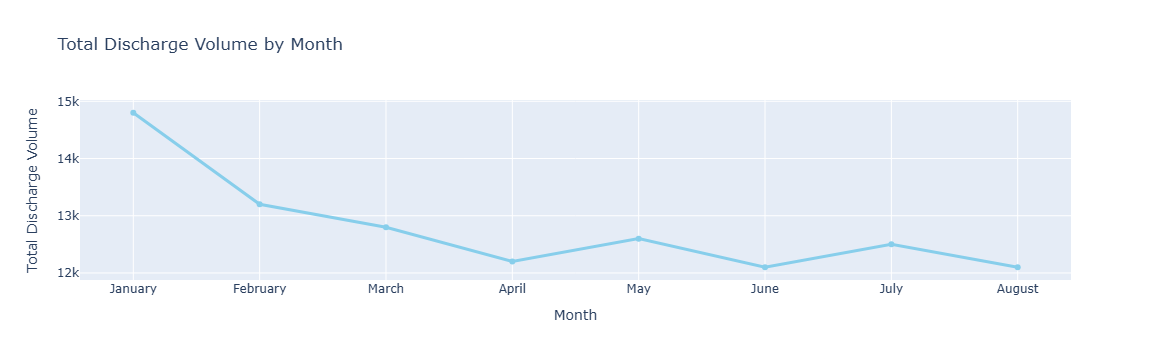

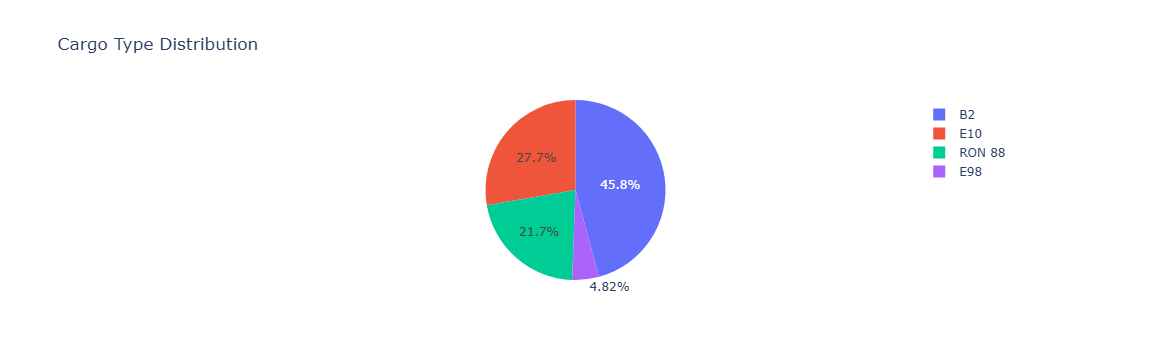

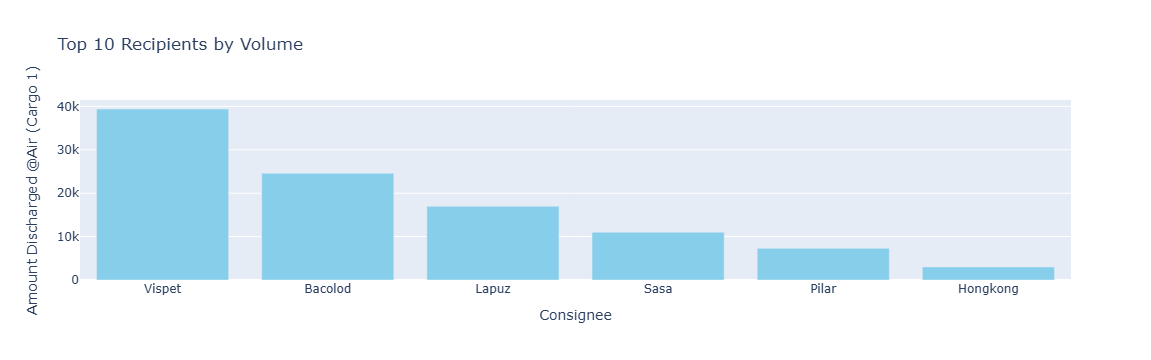

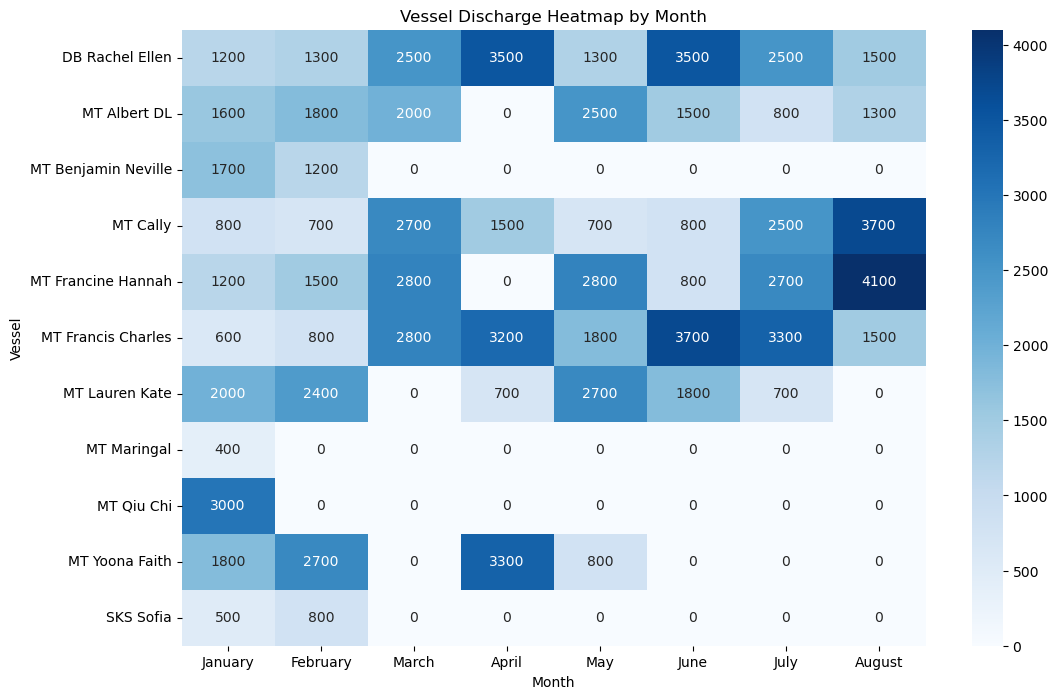

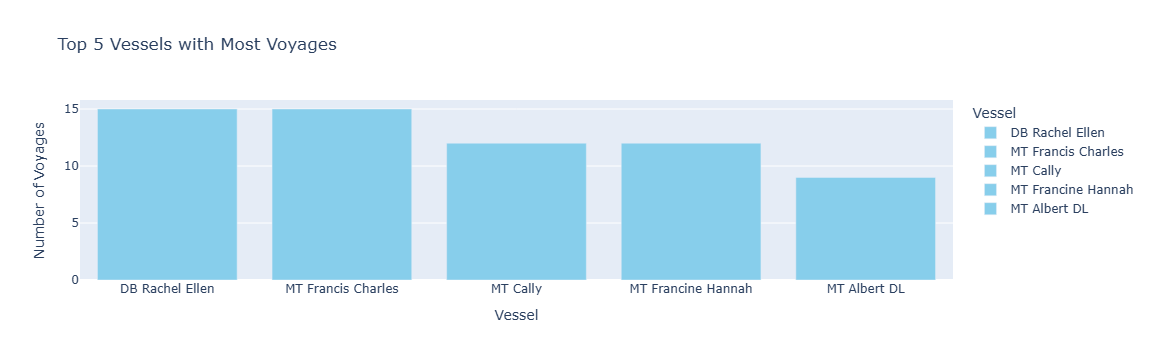

In [5]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import Dropdown, Output, HBox

#-------------------------------------------------------------------------------------

df = pd.read_excel("vessel_data.xlsx")
df.head()

df['Month'] = pd.Categorical(df['Month'],
    categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August'],
    ordered=True
)
df = df.sort_values('Month')

#-------------------------------------------------------------------------------------

total_vessels = df['Vessel'].nunique()

total_voyages = df['Voy #'].nunique()

total_b2 = df[df['Cargo'] == 'B2']["Amount Discharged @Air (Cargo 1)"].sum()

total_e10 = df[df['Cargo'] == 'E10']["Amount Discharged @Air (Cargo 1)"].sum()

total_ron88 = df[df['Cargo'] == 'RON 88']["Amount Discharged @Air (Cargo 1)"].sum()

#-------------------------------------------------------------------------------------

import plotly.graph_objects as go

fig_cards = go.Figure()

fig_cards.add_trace(go.Indicator(
    mode="number",
    value=total_vessels,
    title={"text": "Total Vessels"},
    domain={'x': [0, 0.2], 'y': [0, 1]}
))

fig_cards.add_trace(go.Indicator(
    mode="number",
    value=total_voyages,
    title={"text": "Total Voyages"},
    domain={'x': [0.2, 0.4], 'y': [0, 1]}
))

fig_cards.add_trace(go.Indicator(
    mode="number",
    value=total_b2,
    title={"text": "Total B2 (KL)"},
    domain={'x': [0.4, 0.6], 'y': [0, 1]}
))

fig_cards.add_trace(go.Indicator(
    mode="number",
    value=total_e10,
    title={"text": "Total E10 (KL)"},
    domain={'x': [0.6, 0.8], 'y': [0, 1]}
))

fig_cards.add_trace(go.Indicator(
    mode="number",
    value=total_ron88,
    title={"text": "Total RON 88 (KL)"},
    domain={'x': [0.8, 1], 'y': [0, 1]}
))

fig_cards.update_layout(
    grid={'rows': 1, 'columns': 5},
    title_text="VESSEL DISCHARGE SUMMARY DASHBOARD",
    height=200
)

fig_cards.show()

#-------------------------------------------------------------------------------------

vessel_dropdown = widgets.Dropdown(
    options=['All'] + sorted(df['Vessel'].unique().tolist()),
    description='Vessel:',
    value='All'
)

month_dropdown = widgets.Dropdown(
    options=['All'] + sorted(df['Month'].unique().tolist()),
    description='Month:',
    value='All'
)

output = widgets.Output()

def update_dashboard(change):
    with output:
        clear_output(wait=True)
        
        filtered_df = df.copy()
        if vessel_dropdown.value != 'All':
            filtered_df = filtered_df[filtered_df['Vessel'] == vessel_dropdown.value]
        if month_dropdown.value != 'All':
            filtered_df = filtered_df[filtered_df['Month'] == month_dropdown.value]
        
        fig = px.bar(
            filtered_df, 
            x='Cargo', 
            y='Amount Discharged @Air (Cargo 1)', 
            title='Filtered Cargo Discharge',
            color_discrete_sequence=['#87CEEB']
        )
        
        fig.show()
        
vessel_dropdown.observe(update_dashboard, names='value')
month_dropdown.observe(update_dashboard, names='value')

display(widgets.HBox([vessel_dropdown, month_dropdown]))
display(output)

update_dashboard(None)

#-------------------------------------------------------------------------------------

monthly_volume = df.groupby('Month', observed=True)["Amount Discharged @Air (Cargo 1)"].sum().reset_index()

fig1 = px.line(
    monthly_volume,
    x='Month',
    y='Amount Discharged @Air (Cargo 1)',
    title='Total Discharge Volume by Month',
    color_discrete_sequence=['#87CEEB'],
    markers=True
)

fig1.update_traces(line=dict(width=3))
fig1.update_layout(xaxis_title='Month', yaxis_title='Total Discharge Volume')

fig1.show()

#-------------------------------------------------------------------------------------

cargo_dist = df['Cargo'].value_counts().reset_index()
cargo_dist.columns = ['Cargo Type', 'Count']
fig2 = px.pie(
    cargo_dist, 
    values='Count', 
    names='Cargo Type', 
    title='Cargo Type Distribution'
)

fig2.show()

#-------------------------------------------------------------------------------------

top_consignee = df.groupby('Consignee')["Amount Discharged @Air (Cargo 1)"].sum().sort_values(ascending=False).head(10).reset_index()
fig3 = px.bar(
    top_consignee, 
    x='Consignee', 
    y='Amount Discharged @Air (Cargo 1)', 
    title='Top 10 Recipients by Volume',
    color_discrete_sequence=['#87CEEB'])
fig3.show()

#-------------------------------------------------------------------------------------

pivot = pd.pivot_table(
    df,
    values='Amount Discharged @Air (Cargo 1)',
    index='Vessel',
    columns='Month',
    aggfunc='sum',
    fill_value=0,
    observed=True
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt='g', cmap='Blues')
plt.title('Vessel Discharge Heatmap by Month')
plt.show()

#-------------------------------------------------------------------------------------

top_vessels = df.groupby('Vessel')['Voy #'].nunique().reset_index()

top_vessels = top_vessels.sort_values(by='Voy #', ascending=False).head(5)

fig4 = px.bar(
    top_vessels,
    x='Vessel',
    y='Voy #',
    title='Top 5 Vessels with Most Voyages',
    labels={'Voy #': 'Number of Voyages'},
    color='Vessel',
    color_discrete_sequence=['#87CEEB']
)

fig4.show()
